<a href="https://colab.research.google.com/github/pabodaR/sentiment-analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Analysis**


**Exploratory Data Analysis (EDA)**
1. Loading Data: Import the dataset into a pandas DataFrame.
2. Initial Inspection: Check the structure, size, and data types.
3. Descriptive Statistics: Summarize the dataset using basic statistics.
4. Visualizations: Create plots to understand the distribution and relationships in the data.

**Preprocessing**
1. Text Cleaning: Convert text to lowercase, remove punctuation
2. Tokenization: Split text into individual words or tokens.
3. Stemming
4. Building corpus

**Model Building**
1. Random Forest
2. Logistic Regression
3. SVM (Support Vector Machine)
* Evaluation: Assess model performance using accuracy, classification report, and confusion matrix.








**1. Exploratory Data Analysis**

In [31]:
import pandas as pd

In [41]:
!pip install wordcloud

In [33]:
data = pd.read_csv('/content/drive/MyDrive/portfolio/classification/amazon_alexa.tsv', delimiter = '\t', quoting =3)
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [40]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

**Check for null values**

In [34]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [35]:
data.dropna(inplace=True)

In [37]:
data.shape

(3149, 5)

**Check for duplicate values**

In [36]:
data.duplicated().sum()

715

In [38]:
data.drop_duplicates(inplace=True)

**Length column - length of verified reviews**

In [39]:
data['length'] = data['verified_reviews'].apply(len)
data.head()


,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


**Ratings**

<Axes: xlabel='rating'>

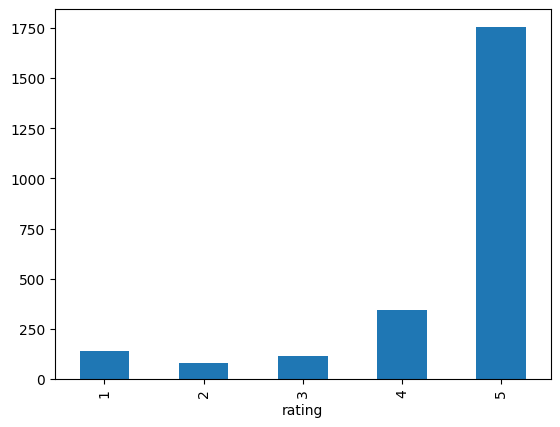

In [43]:
data['rating'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='count'>

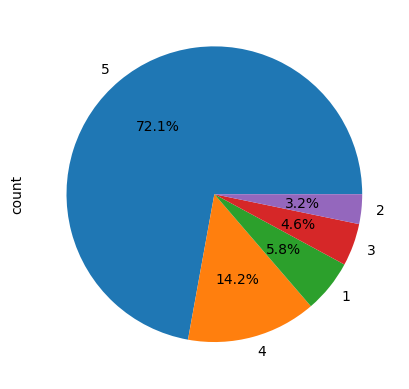

In [46]:
data['rating'].value_counts().plot(kind='pie',autopct='%1.1f%%')



*   Majority of the ratings are of rating 5.
*   Least of the ratings are of rating 2.



**Variation**

In [58]:
data['variation'].value_counts()

variation
Configuration: Fire TV Stick    342
Black  Plus                     270
Black                           261
Black  Show                     260
Black  Dot                      252
Black  Spot                     241
Charcoal Fabric                 219
White  Spot                     108
White  Dot                       92
White                            90
White  Show                      85
Heather Gray Fabric              79
White  Plus                      78
Sandstone Fabric                 45
Oak Finish                        7
Walnut Finish                     5
Name: count, dtype: int64

<Axes: xlabel='variation'>

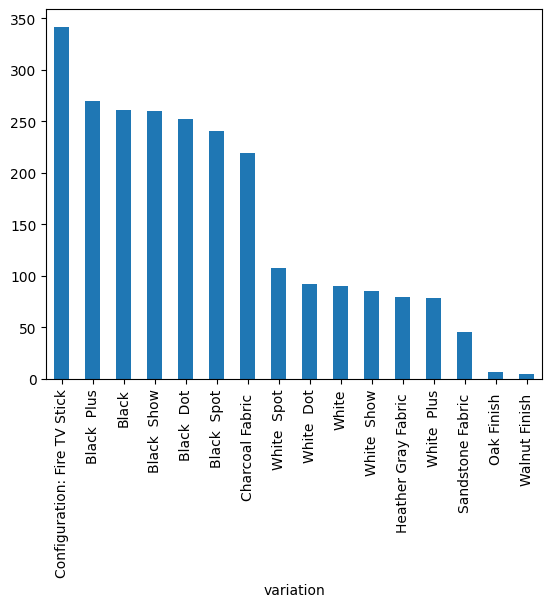

In [47]:
data['variation'].value_counts().plot(kind='bar' )



*   Fire TV Stick is the most common variation.
*   Least common variation is Walnut Finish



**Feedback**

In [48]:
data['feedback'].value_counts()

feedback
1    2214
0     220
Name: count, dtype: int64

In [51]:
r_0 = data[data['feedback'] == 0].iloc[:]['verified_reviews']
r_0

46      "It's like Siri, in fact, Siri answers more ac...
111     Sound is terrible if u want good music too get...
141                                    Not much features.
162     "Stopped working after 2 weeks ,didn't follow ...
176                                  Sad joke. Worthless.
                              ...                        
2696    Echo Dot responds to us when we aren't even ta...
2697                NOT CONNECTED TO MY PHONE PLAYLIST :(
2716    The only negative we have on this product is t...
2740                                    I didn’t order it
2745    The product sounded the same as the emoji spea...
Name: verified_reviews, Length: 220, dtype: object

In [52]:
r_1 = data[data['feedback'] == 1].iloc[:]['verified_reviews']
r_1

0                                           Love my Echo!
1                                               Loved it!
2       "Sometimes while playing a game, you can answe...
3       "I have had a lot of fun with this thing. My 4...
4                                                   Music
                              ...                        
2796    "I do love these things, i have them running m...
2797    "Only complaint I have is that the sound quali...
2798                                                 Good
2799                          Nice little unit  no issues
2800    "The echo dot was easy to set up and use. It h...
Name: verified_reviews, Length: 2214, dtype: object



*   Feedback = 0, verified review is negative
*   Feedback = 1, verified review is positive


<Axes: ylabel='count'>

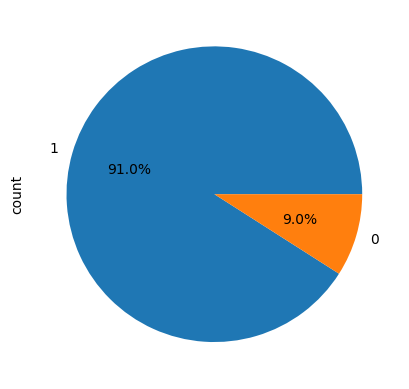

In [53]:
data['feedback'].value_counts().plot(kind='pie',autopct='%1.1f%%')



*   91% of the reviews are positive.
*   9% of the reviews are negative.



**Rating when feedback = 0**

In [54]:
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    141
2     79
Name: count, dtype: int64

<Axes: ylabel='count'>

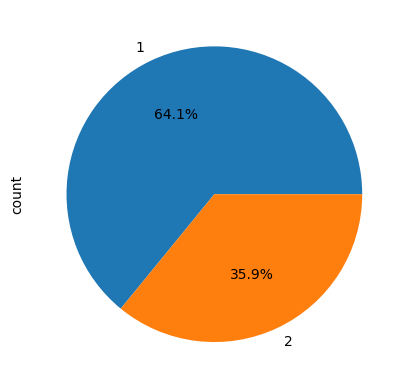

In [56]:
data[data['feedback'] == 0]['rating'].value_counts().plot(kind='pie',autopct='%1.1f%%')



*   When feedback = 0, 64% of ratings are 1
*   When feedback = 0, 35% of ratings are 2



In [55]:
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    1756
4     345
3     113
Name: count, dtype: int64

<Axes: ylabel='count'>

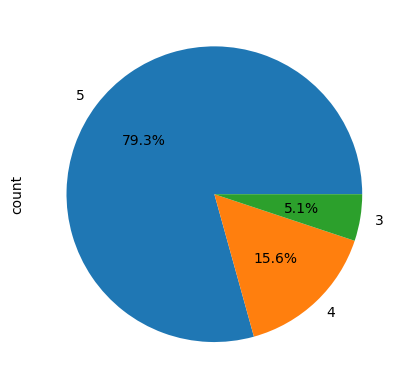

In [57]:
data[data['feedback'] == 1]['rating'].value_counts().plot(kind='pie',autopct='%1.1f%%')


When rating = 1,
*   79% of the ratings are 5
*   15% of the ratings are 4
*   5% of the ratings are 3





**Variation vs Rating**

Text(0.5, 1.0, 'Variation vs Rating')

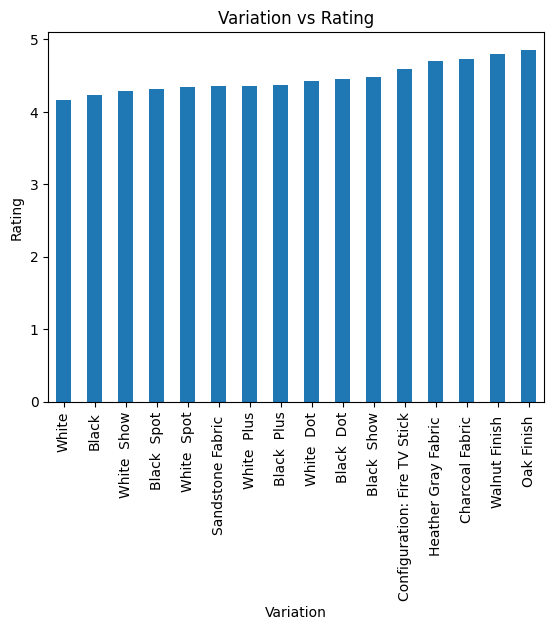

In [60]:
from matplotlib import pyplot as plt
import seaborn as sns

data.groupby('variation')['rating'].mean().sort_values().plot(kind='bar')
plt.xlabel('Variation')
plt.ylabel('Rating')
plt.title('Variation vs Rating')



*   White has a lower rating
*   Oak finish has the highest rating



**Length**

<ipython-input-61-b4f54e98e16e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['length']).set_title('Length of review')


Text(0.5, 1.0, 'Length of review')

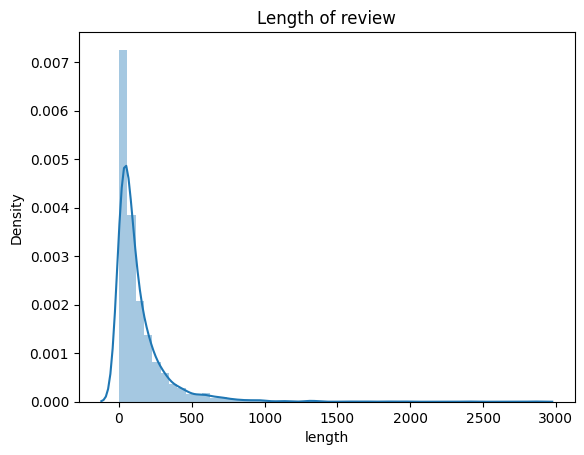

In [61]:
import seaborn as sns
sns.distplot(data['length']).set_title('Length of review')

**Length when feedback = 0**

Text(0.5, 1.0, 'Length when feedback = 0')

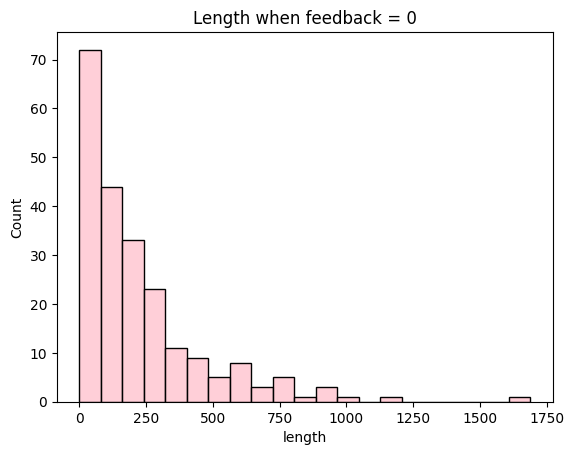

In [62]:
sns.histplot(data[data['feedback']==0]['length'], color = 'pink').set_title('Length when feedback = 0')

**Length when feedback = 1**

Text(0.5, 1.0, 'Length when feedback = 0')

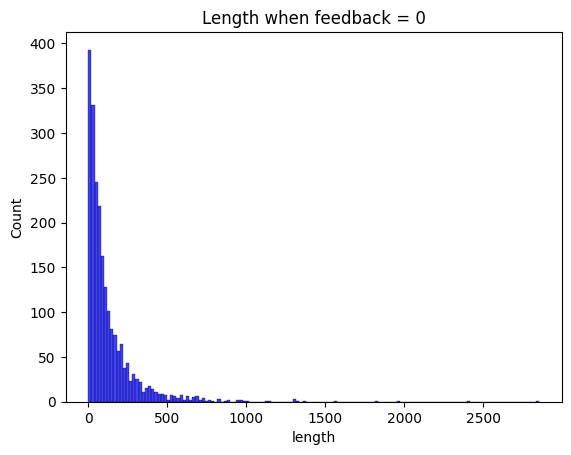

In [64]:
sns.histplot(data[data['feedback']==1]['length'], color = 'blue').set_title('Length when feedback = 0')



*   length is lower when feedback is 0
*   length is higher when feedback is 1




**Count Vectorizer**


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [83]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data['verified_reviews'])

**Divide data in to negative and positive reviews**

In [84]:
positive_reviews = ' '.join([review for review in data[data['feedback']==1]['verified_reviews']])
positive_reviews = positive_reviews.lower().split()

negative_reviews = ' '.join([review for review in data[data['feedback']==0]['verified_reviews']])
negative_reviews = negative_reviews.lower().split()



**Find words from reviews which are present only in the corresponding feedback category**

In [85]:
unique_neg = [x for x in negative_reviews if x not in positive_reviews]
unique_neg = " ".join(unique_neg)
unique_neg


'siri, accurately deals." "stopped ,didn\'t commands!? working?" worthless. plug-in assumption sell rechargeable battery. boom flexibility lapsed, differentiate among speaks nobody her...not enter on.. unresponsive requests. select sending asap. refund 1. refunds both???!!! spoken promp stopped. refund poor "never techie dollar store. then." "initially, \'alexa\' foot echos/echo refurbished." performing often, nothing. fm reception live. horrible. native americans whose texas accent birth additionally reception poor marginal. extender ten difference. disconnected dust collectors. worked. broken. &#34;fixes&#34; accomplished connection. "&#34;never &#34; &#34;certified &#34; poor acknowledge indicated. perfectly.very !!!!" crashed crashed, over. orange freeze reboot freeze sentence. holding action buyer "now weary actively 3-4, concerning. release widespread firmware prevent have, "there fix. registered $39.99 (same ones), brand, spanking "two connection, all! worst fan...love brand...u

In [86]:
unique_pos = [x for x in positive_reviews if x not in negative_reviews]
unique_pos = " ".join(unique_pos)
unique_pos

'echo! "sometimes game, home." yr learns dinosaurs, games categories. well." gift. accessible, do." "without cellphone, ipad alarm. r deaf, bedroom her.it random response. smartbon politics 5th purchased. room house. specifily controlling house. "love listened songs childhood! news, weather, information! great!" 85 dad, talks constantly." learning eveyday! figuring understand. laugh mother knee did.she enjoys do...alexa song, where, cook that!" "love, love, love!!" expected.... hates purchase. toy. household member! learn featues benefits 2nd improvement shorter greater fabric/color choices. ring top, plus/minus buttons. ring w comforting. :) standard usb charger /port round pin. alexa/echo/computer. like? :)" understands commands specific playlists songs spotify. lacking major programs. "we alexa! itunes, podcasts anypod, flash briefing morning. rely custom lists. volume. we\'re we\'ll uses.sometimes we\'re saying." "have days. size, stationed counter intrusive at." plays bedroom, imp

**Word cloud for positive reviews**

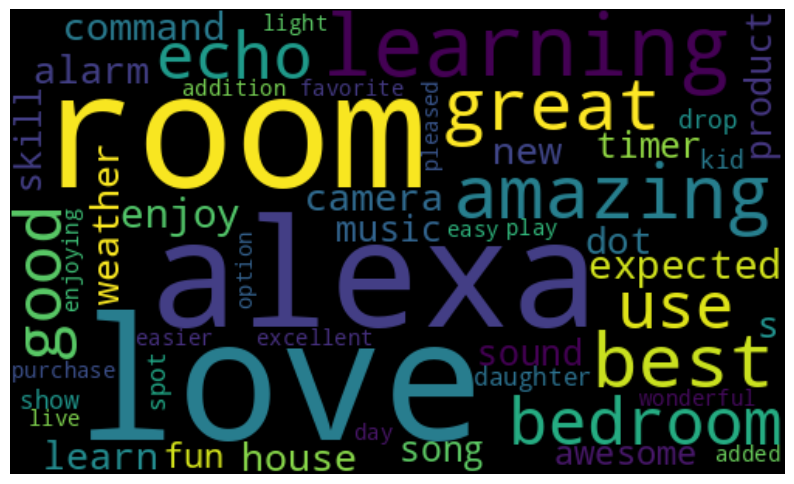

In [88]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=300, random_state=21, max_font_size=110,max_words= 50).generate(unique_pos)
plt.figure(figsize=(10, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**Word cloud for negative reviews**

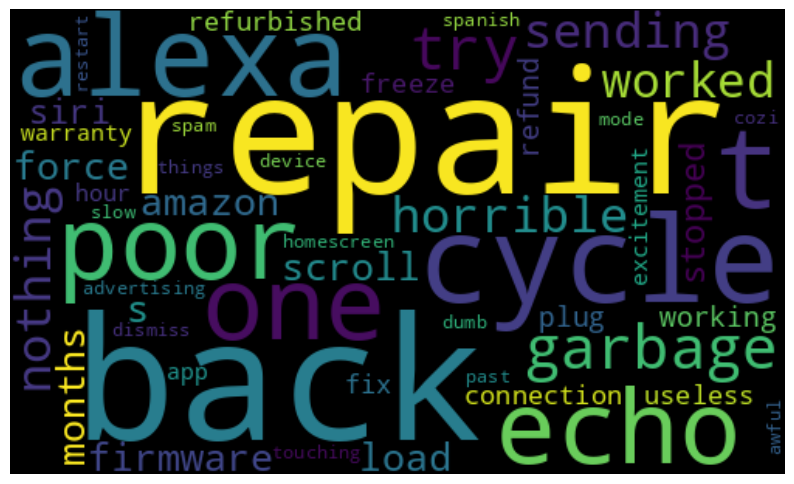

In [87]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=300, random_state=21, max_font_size=110,max_words= 50).generate(unique_neg)
plt.figure(figsize=(10, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**Preprocessing**

build corpus from 'verified reviews':

1.   replace non alphabetical characters
2.   convert to lower case
3.   split to words
4.   stem the word
5.   add to corpus




In [89]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [92]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
stemmer = PorterStemmer()
for i in range(0, len(data)):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower()
  review = review.split()
  review = [stemmer.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

**Bag of Words with Count Vectorizer**

In [93]:
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()
y= data['feedback'].values

In [98]:
X.shape

(2434, 2500)

In [99]:
y.shape

(2434,)

In [97]:
import pickle
pickle.dump(cv, open('cv-transform.pkl', 'wb'))

**Split train and test sets**

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 15)

In [104]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1703, 2500)
(731, 2500)
(1703,)
(731,)


**Scaling**

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
pickle.dump(scaler, open('scaling.pkl', 'wb'))

**Random Forest**

In [107]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [108]:
print(random_forest_model.score(X_train, y_train))
print(random_forest_model.score(X_test, y_test))

0.9935408103347034
0.9124487004103967


In [109]:
y_pred = random_forest_model.predict(X_test)

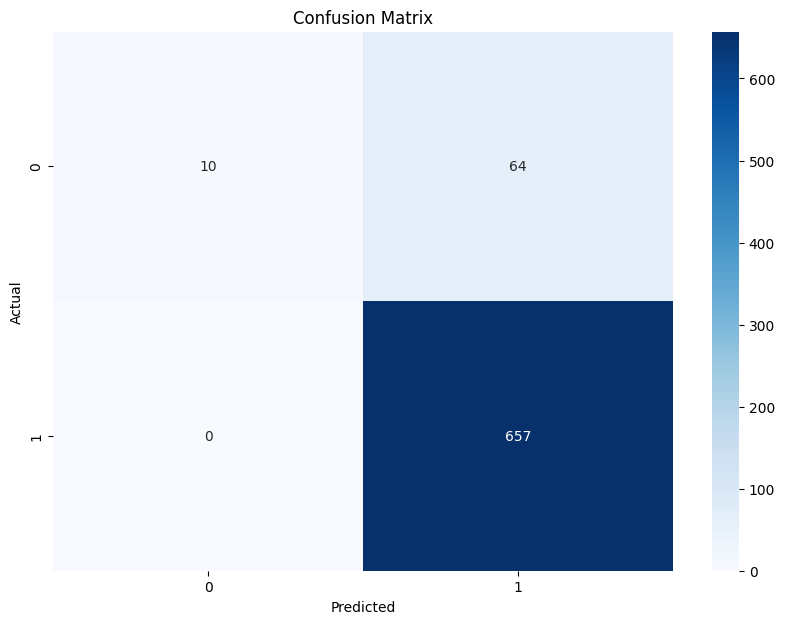

In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=random_forest_model.classes_, yticklabels=random_forest_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Logistic Regression**

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix as cm

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)


print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9606576629477392
0.9192886456908345


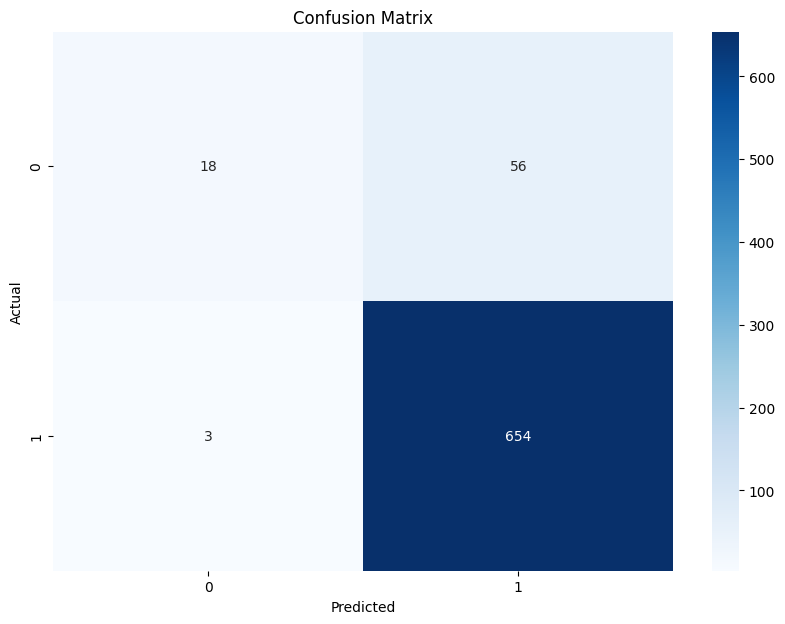

In [124]:
# Compute the confusion matrix
cm = cm(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Support Vector Machine**

In [126]:
from sklearn.svm import SVC

# Train the SVM model
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))



0.9841456253669995
0.9274965800273598


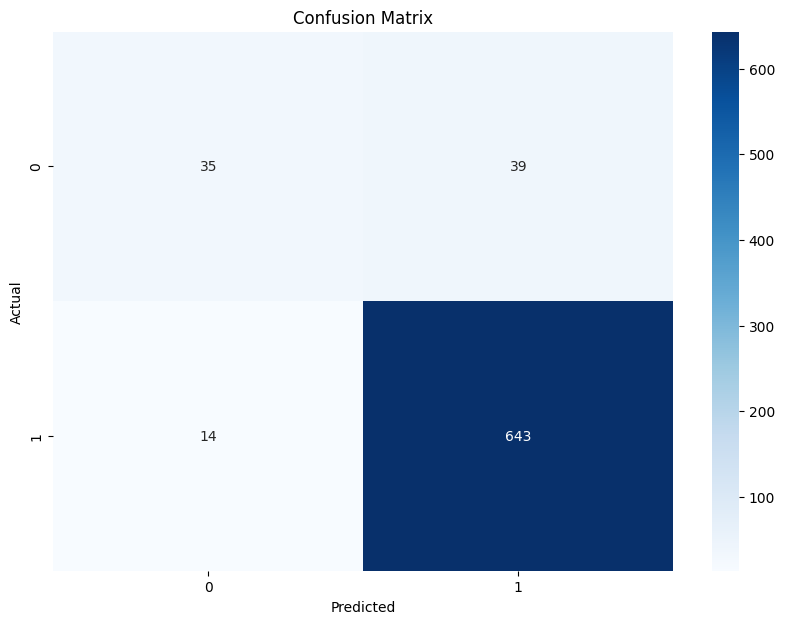

In [128]:
# Compute the confusion matrix
conf_matrix = cm(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()